**Name:** <span style="color:red">Maria Cobo and Alba Mas</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2 (PART 1)
# Robustness of gene regulatory networks

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In this session we will study two publicly available biological networks. We will assess their robustness to attacks. To that end we will use the Python package `NetworkX`.

# 0. NetworkX instructions

These are the main `NetworkX` instructions that you will need to use in this practical:

*   `<graph>.to_undirected()` returns an undirected graph representation of the `<graph>` directed graph object. This allows to use some of the Networkx methods that only work with undirected graphs.

*   `<graph_copy> = <graph>.copy()` returns a copy of the `<graph>` graph object. 

*   `<graph>.number_of_nodes()` returns the number of nodes of the `<graph>` object.

*   `<graph>.number_of_edges()` returns the number of edges of the `<graph>` object.

*   `<graph>.nodes()` returns a list with all the nodes in `<graph>`.

*   `networkx.adjacency_matrix(<graph>)` creates the adjacency matrix of a network. The matrix is produced in the `SciPy` sparse format. You should use the `todense` method of this data type to generate a `numpy` matrix.

*   `networkx.number_connected_components(<graph>)` returns the number of connected components of the undirected graph `<graph>`.

*   `networkx.connected_component_subgraphs(<graph>)` returns a list of the connected components in the undirected graph `<graph>`. The components are ordered from the largest to the smallest. ***Use the function below if you receive an error here***
*   `<graph>.subgraph(c) for c in nx.connected_components(<graph>)` does the same as the function directly above. Use this if you receive an error when trying to use the function above.

*   `<graph>.remove_node(<node>)` removes the node with name `<node>` from the `<graph>` graph.
*   `networkx.draw_networkx` draws the network. It is convenient to use the `pos` argument with the `spring_layout` function of NetworkX to position the nodes such that the network is not too tangled.

First, load all necessary Python modules (including NetworkX).

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Network analysis

There is a large number of databases of cellular regulatory networks (involving metabolic reactions, protein-protein interactions, gene regulation, ...). In this practical session we will work with transcription factor networks, which can usually be treated as directed simple graphs. We will the **RegulonDB** database, which contains most known gene regulatory interactions in _Escherichia coli_. To download the database, access the [RegulonDB website](http://regulondb.ccg.unam.mx/), then click **Downloads** and then **Experimental Datasets**. Finally, download the file labeled **TF - gene interactions**, and place it in the folder where you will be working.

To load the network you can use the following function:

In [5]:
def load_network(file_path):
    file_object = open(file_path, mode="r")       # open the file in reading (r) mode
    network_object = nx.DiGraph()                 # Create a directed graph object
    
    for line in file_object:                      # For each line in the file
        if line.startswith("#") or line == "\n":  # skip the line if it starts with #, or
                                                  # if it's empty ()
            continue
        line = line.lower().split()               # remove uppercase letters and
                                                  # split the line into words
        network_object.add_edge(line[0], line[1]) # add an edge going from the node specified
                                                  # in the first column to the
                                                  # one specified in the second column
    return network_object

Load the database into a graph object and calculate the number of genes (nodes), interactions (edges) and the mean degree.

In [6]:
graph=load_network("network_tf_gene.txt")

nodes = graph.number_of_nodes()
print('Number of genes:', nodes)

edges = graph.number_of_edges()
print('Number of interaction:', edges)

mean_degree = (2*edges/nodes)
print('Mean degree:', mean_degree)


Number of genes: 1909
Number of interaction: 4439
Mean degree: 4.650602409638554


---

<span style="color:red">Comment your results here</span>

This analysis indicates that there are 1,909 genes involved, with a total of 4,439 interactions between them. The mean degree, calculated as approximately 4.65, reflects the average number of interactions each gene has with others in the network. This degree suggests a relatively interconnected network, where each gene, on average, interacts with about 4 to 5 other genes. 

---

How many _connected components_ (a set of vertices in a graph that are linked to each other by
paths) does the network have? Select the largest component of the network (save it to a new
graph) and repeat the calculations of number of nodes, number of edjes and mean degree. Draw this new subgraph.

Number of connected components: 27
Number of genes: 1802
Number of edges: 4328
Mean degree: 4.803551609322975


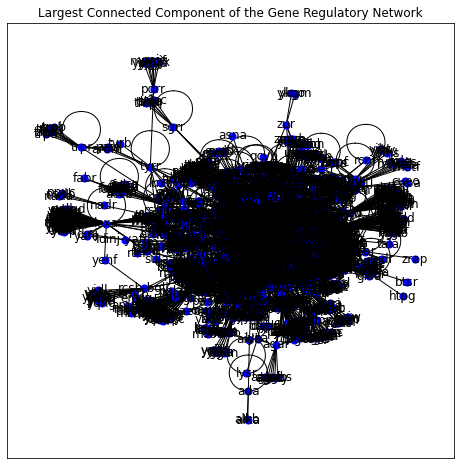

In [7]:
import scipy.sparse as sp 

undirected_graph = graph.to_undirected()
num_components = nx.number_connected_components(undirected_graph)
print('Number of connected components:', num_components)

# Get the largest connected component and create subgraph
largest_component_nodes = max(nx.connected_components(undirected_graph), key=len)
largest_subgraph = undirected_graph.subgraph(largest_component_nodes).copy()

# Calculate the number of nodes and edges in the largest component
largest_nodes = largest_subgraph.number_of_nodes()
largest_edges = largest_subgraph.number_of_edges()

# Calculate the mean degree of the largest component
largest_mean_degree = (2 * largest_edges) / largest_nodes

# Print the results
print("Number of genes:", largest_nodes)
print("Number of edges:", largest_edges)
print("Mean degree:", largest_mean_degree)


# Draw the largest component
plt.figure(figsize=(8, 8))
nx.draw_networkx(largest_subgraph, node_size=50, node_color="blue", with_labels=True)
plt.title("Largest Connected Component of the Gene Regulatory Network")
plt.show()


---

<span style="color:red">Comment your result here</span>

The gene regulatory network consists of 27 connected components, indicating that it has multiple disconnected sub-networks. The largest connected component contains 1,802 genes and 4,328 interactions, which represents the majority of the network. The mean degree of this largest component is approximately 4.80, slightly higher than the overall network’s mean degree. This suggests that the largest component is more densely connected, with each gene, on average, participating in nearly five interactions. The visualization of this subgraph highlights the primary structure of the network and emphasizes the interconnectivity among the majority of genes.

---

Next, create the adjacency matrix of the network, and use it to compute the degrees of all nodes and the average degree of the network. Print the average degree and plot the degree distribution of the network **(do NOT use specially dedicated functions of NetworkX for those tasks)**.

Average degree of the network: 4.74361820199778


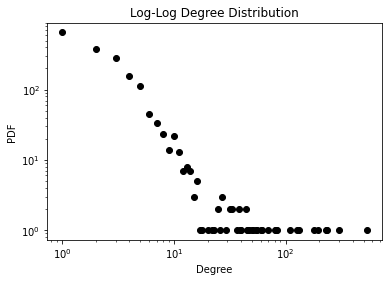

In [8]:
adj_matrix = nx.adjacency_matrix(largest_subgraph).todense()
adj_matrix

degrees = np.sum(adj_matrix, axis=1)
degrees = np.asarray(degrees).flatten()

average_degree = np.mean(degrees)
print('Average degree of the network:', average_degree)

unique_degrees, counts = np.unique(degrees, return_counts=True)

# Plot
plt.scatter(unique_degrees, counts, color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.title('Log-Log Degree Distribution')

# Show the plot
plt.show()


---

<span style="color:red">Comment your result here:</span>

The average degree of approximately 4.74 indicates that, on average, each node in the network is connected to about 4.74 other nodes. 

By looking at the graph we can see that the bigger the degree the less nodes we have, suggesting that most nodes in the network have a small number of connections. So, this pattern indicates that most nodes in the network have only a few connections, while only a small number of nodes are highly connected.  

---

# 2. Robustness to failures

Different classes of networks react in different ways when some of their nodes disappear. Here we will study the robustness to random failures **using only the largest connected component of the RegulonDB network**. To do so, copy the largest connected component of the network into a new graph. Next remove iteratively 20 arbitrary (i.e. randomly chosen) nodes from this graph and check if its connectivity has changed: does it remain as a single connected component or does the failure break it apart into multiple sub-graphs?

**Note**: to select a random node use the function `randint` from the module `numpy.random`.

In [13]:
import networkx as nx
import numpy as np

# Assuming you already have `largest_subgraph` from previous steps
graph_copy = largest_subgraph.copy()

# Remove 20 random nodes iteratively
num_nodes_to_remove = 20

for i in range(num_nodes_to_remove):
    random_node = np.random.choice(graph_copy.nodes()) # random node

    graph_copy.remove_node(random_node) # remove random node
    
    num_components = nx.number_connected_components(graph_copy.to_undirected())
    
    # Output result after each node removal
    print(f"Failure of node {random_node} breaks the largest connected component into {num_components} portion(s)")

    # If the graph has split into more than one component, stop
    if num_components > 1:
        print(f"The network broke into {num_components} components after removing {i + 1} nodes.")


Failure of node rpli breaks the largest connected component into 1 portion(s)
Failure of node osmy breaks the largest connected component into 1 portion(s)
Failure of node pspd breaks the largest connected component into 1 portion(s)
Failure of node xdhc breaks the largest connected component into 1 portion(s)
Failure of node csie breaks the largest connected component into 1 portion(s)
Failure of node gloa breaks the largest connected component into 1 portion(s)
Failure of node pncb breaks the largest connected component into 2 portion(s)
The network broke into 2 components after removing 7 nodes.
Failure of node tam breaks the largest connected component into 2 portion(s)
The network broke into 2 components after removing 8 nodes.
Failure of node trmd breaks the largest connected component into 2 portion(s)
The network broke into 2 components after removing 9 nodes.
Failure of node paah breaks the largest connected component into 2 portion(s)
The network broke into 2 components after

---

<span style="color:red">Comment your result here:</span>
In this analysis, we iteratively removed 20 random nodes from the largest connected component of the Escherichia coli gene regulatory network. After each node removal, we checked whether the largest component had split into multiple portions.

In some runs the network remains connected after 20 random node failures, indicating a high level of robustness to random disruptions. This behavior is typical of biological networks, which are often resilient to random errors but may be more vulnerable to targeted attacks on key nodes. 

But in other runs it shows that the network is not uniformly robust to random failures. While it may survive several node removals without significant disruption in some cases, it can break down into multiple disconnected components if key nodes are randomly removed. 

---

# 3. Sensitivity to attacks

We now study the effect of directed attacks, namely removal of the most important nodes of the network, and see how they affect its connectivity. Although there is a variety of ways to measure the importance of a node, for the sake of simplicity we will restrict ourselves to using the degree.

Using the `sorted` function in Python, list the 10 nodes with highest degree.

In [8]:
# Calculate the degree of each node in the directed graph
degree_dict = dict(graph.degree())

# Sort nodes based on their degree in descending order
sorted_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)

# List the top 10 nodes with the highest degree
top_10_nodes = sorted_nodes[:10]

print(top_10_nodes)

['crp', 'fnr', 'fis', 'ihf', 'h-ns', 'arca', 'fur', 'narl', 'lrp', 'nsrr']


Generate a new copy of the largest component of the network as you did above. Remove iteratively the 10 nodes with highest degree of the network and check how the connectivity changes.

In [9]:
# Make a copy of the largest connected component
attacked_graph = largest_subgraph.copy()

# Get the degree of each node in the largest connected component
degree_dict = dict(attacked_graph.degree())

# Sort the nodes based on degree in descending order
sorted_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)

# Get the top 10 nodes with the highest degree
top_10_nodes = sorted_nodes[:10]

# Iteratively remove the top 10 nodes and check the connectivity
for node in top_10_nodes:
    attacked_graph.remove_node(node)
    num_components = nx.number_connected_components(attacked_graph)
    print(f"Attacking node {node} breaks the largest connected component into {num_components} portion(s)")


Attacking node crp breaks the largest connected component into 77 portion(s)
Attacking node fnr breaks the largest connected component into 107 portion(s)
Attacking node fis breaks the largest connected component into 171 portion(s)
Attacking node ihf breaks the largest connected component into 197 portion(s)
Attacking node h-ns breaks the largest connected component into 217 portion(s)
Attacking node arca breaks the largest connected component into 242 portion(s)
Attacking node fur breaks the largest connected component into 290 portion(s)
Attacking node narl breaks the largest connected component into 332 portion(s)
Attacking node lrp breaks the largest connected component into 396 portion(s)
Attacking node nsrr breaks the largest connected component into 432 portion(s)


---

<span style="color:red">Comment your result here:</span>
In the directed attacks simulation, we progressively removed the 10 nodes with the highest degree from the largest connected component of the regulatory network

The nodes removed (such as crp, fnr, fis, etc.) are central regulators in the network. These nodes have numerous connections to other genes, and their removal causes a cascading breakdown of the network’s overall connectivity.

The gene regulatory network shows high fragility in response to targeted attacks on the most connected nodes. 

The results of directed attacks are much more dramatic than the random failures observed earlier. Random node removals did not fragment the network as quickly or significantly.

In biological systems, this sensitivity to attacks on critical nodes implies that certain key regulators (like crp, fnr, etc.) are vital for maintaining cellular function and gene regulation. 

---